![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

# Legal NLP

In this notebook, you will learn how to use Spark NLP and Legal NLP to identify relevant entities in legal texts using our state-of-the-art Named-Entity Recognition (NER) models and the recent Zero-Shot models.

We will cover the full analysis cycle, from reading a document in PDF formar, extracting its text contents, classifying its sections and applying NER models on specific sections.

Let`s dive in!

## Introduction

### Classification models

For the text classification tasks, we will use two annotators:

- `ClassifierDL`: uses the state-of-the-art Universal Senten- `ClassifierDL`: uses the state-of-the-art Universal Sentence Encoder as an input for text classifications. Then, a deep learning model (DNNs) built with TensorFlow that supports `Binary Classification` and `Multiclass Classification` (up to 100 classes).
- `MultiClassifierDL`: `Multilabel Classification` (can predict more than one class for each text) using a Bidirectional GRU with Convolution architecture built with TensorFlow that supports up to 100 classes. The inputs are Sentence Embeddings such as state-of-the-art UniversalSentenceEncoder, BertSentenceEmbeddings or SentenceEmbeddings.

In Legal NLP, since the number of classes can be very high (over 250) and the texts could belong to more than one topic at the same time (multilabel problem), we pretrained several binary classifiers (yes / no) for many clause types in legal documents that can be used independently.

You can select the topics you are interested in (for example, looking for loans and fiscal-year clauses) and create a pipeline with both of them to detect for those types of clauses in your paragraphs. 

As a reminder, since the models are independent and the task is multilabel, you may get some times positive results for more than one class (i.e, a paragraph talks about loans and fiscal year at the same time).

As an alternative, we also have `MultiClassifierDL` that predicts many clause types in one model. The choice between using binary classifiers or the multilabel model will depend on the document types, and experimentations should be made to verify the accuracy of the models in texts that are too different from the trianed data (CUAD dataset, SEC sample documents, etc.).

Example Classification models:

| title                                                     | language   | predicted_entities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             | compatible_editions            |
|:----------------------------------------------------------|:-----------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------|
| Human Rights Articles Classification                      | en         | ['Artículo 1. Obligación de Respetar los Derechos', 'Artículo 2. Deber de Adoptar Disposiciones de Derecho Interno', 'Artículo 3. Derecho al Reconocimiento de la Personalidad Jurídica', 'Artículo 4. Derecho a la Vida', 'Artículo 5. Derecho a la Integridad Personal', 'Artículo 6. Prohibición de la Esclavitud y Servidumbre', 'Artículo 7. Derecho a la Libertad Personal', 'Artículo 8. Garantías Judiciales', 'Artículo 9. Principio de Legalidad y de Retroactividad', 'Artículo 11. Protección de la Honra y de la Dignidad', 'Artículo 12. Libertad de Conciencia y de Religión', 'Artículo 13. Libertad de Pensamiento y de Expresión', 'Artículo 14. Derecho de Rectificación o Respuesta', 'Artículo 15. Derecho de Reunión', 'Artículo 16. Libertad de Asociación', 'Artículo 17. Protección a la Familia', 'Artículo 18. Derecho al Nombre', 'Artículo 19. Derechos del Niño', 'Artículo 20. Derecho a la Nacionalidad', 'Artículo 22. Derecho de Circulación y de Residencia', 'Artículo 23. Derechos Políticos', 'Artículo 24. Igualdad ante la Ley', 'Artículo 25. Protección Judicial', 'Artículo 26. Desarrollo Progresivo', 'Artículo 27. Suspensión de Garantías', 'Artículo 28. Cláusula Federal', 'Artículo 21. Derecho a la Propiedad Privada', 'Artículo 29. Normas de Interpretación', 'Artículo 30. Alcance de las Restricciones', 'Artículo 63.1 Reparaciones'] | ['Legal NLP 1.0', 'Legal NLP'] |
| Legal Absence of certain changes Clause Binary Classifier | en         | ['other', 'absence-of-certain-changes']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | ['Legal NLP 1.0', 'Legal NLP'] |
| Legal Acceleration Clause Binary Classifier               | en         | ['other', 'acceleration']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | ['Legal NLP 1.0', 'Legal NLP'] |
| Legal Access Clause Binary Classifier                     | en         | ['other', 'access']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            | ['Legal NLP 1.0', 'Legal NLP'] |
| Legal Accounting terms Clause Binary Classifier           | en         | ['other', 'accounting-terms']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  | ['Legal NLP 1.0', 'Legal NLP'] |
| Legal Adjustments Clause Binary Classifier                | en         | ['other', 'adjustments']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | ['Legal NLP 1.0', 'Legal NLP'] |
| Legal Agreements Clause Binary Classifier                 | en         | ['other', 'agreements']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | ['Legal NLP 1.0', 'Legal NLP'] |
| Legal Amendments Clause Binary Classifier                 | en         | ['other', 'amendments']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | ['Legal NLP 1.0', 'Legal NLP'] |
| Legal Application of proceeds Clause Binary Classifier    | en         | ['other', 'application-of-proceeds']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           | ['Legal NLP 1.0', 'Legal NLP'] |
| Conventions Classification                                | es         | ['Convención sobre la Eliminación de todas las formas de Discriminación contra la Mujer', 'Convención sobre los Derechos de las Personas con Discapacidad', 'Convención Internacional Sobre la Eliminación de Todas las Formas de Discriminación Racial', 'Convención Internacional sobre la Protección de los Derechos de todos los Trabajadores Migratorios y de sus Familias', 'Convención de los Derechos del Niño', 'Pacto Internacional de Derechos Civiles y Políticos']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                | ['Legal NLP 1.0', 'Legal NLP'] |


For a complete list, check [NLP Models Hub](https://nlp.johnsnowlabs.com/models?edition=Legal+NLP&type=model&task=Text+Classification)

### NER models

Named-Entity Recognition (NER) is the capability to automatically identify relevant entities in the text. For example, person names, company names, public companies trading code, quantities, etc. There are many ways to implement NER, but nowadays the most efficient one is to use models based on deep learning.

The deep neural network architecture for NER model in Spark NLP is BiLSTM-CNN-Char framework. a slightly modified version of the architecture proposed by Jason PC Chiu and Eric Nichols ([Named Entity Recognition with Bidirectional LSTM-CNNs](https://arxiv.org/abs/1511.08308)). It is a neural network architecture that automatically detects word and character-level features using a hybrid bidirectional LSTM and CNN architecture, eliminating the need for most feature engineering steps. This model is implemented in our `NerDL`/`NerModel` annotators that we will experiment with in this section.

At John Snow Labs, we are proud to have a library of state-of-the-art pretrained, out-of-the-box, NLP models. With our newer package Legal NLP it is no different, and we currently support more than 580 models fine tuned for the legal domain. Specifically to NER, we currently have more than 40 models that can identify entities for different business needs.

Example NER models:

| title                                               | language   | predicted_entities                                                                                                                            | compatible_editions            |
|:----------------------------------------------------|:-----------|:----------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------|
| NER on Legal Texts (CUAD, Silver corpus)            | en         | ['PERSON', 'LAW', 'PARTY', 'EFFDATE', 'LOC', 'DATE', 'DOC', 'ORDINAL', 'ROLE', 'PERCENT', 'ORG']                                              | ['Legal NLP 1.0', 'Legal NLP'] |
| Generic Deidentification NER                        | en         | ['AGE', 'CITY', 'COUNTRY', 'DATE', 'EMAIL', 'FAX', 'LOCATION-OTHER', 'ORG', 'PERSON', 'PHONE', 'PROFESSION', 'STATE', 'STREET', 'URL', 'ZIP'] | ['Legal NLP 1.0', 'Legal NLP'] |
| Legal NER - License / Permission Clauses (Bert, sm) | en         | ['PERMISSION', 'PERMISSION_SUBJECT', 'PERMISSION_OBJECT', 'PERMISSION_INDIRECT_OBJECT']                                                       | ['Legal NLP 1.0', 'Legal NLP'] |
| Legal NER (Headers / Subheaders)                    | en         | ['HEADER', 'SUBHEADER']                                                                                                                       | ['Legal NLP 1.0', 'Legal NLP'] |
| Legal NER - Whereas Clauses (sm)                    | en         | ['WHEREAS_SUBJECT', 'WHEREAS_OBJECT', 'WHEREAS_ACTION']                                                                                       | ['Legal NLP 1.0', 'Legal NLP'] |
| Legal NER (Parties, Dates, Document Type - sm)      | en         | ['PARTY', 'EFFDATE', 'DOC', 'ALIAS']                                                                                                          | ['Legal NLP 1.0', 'Legal NLP'] |
| Legal NER (Headers / Subheaders)                    | en         | ['SIGNING_TITLE', 'SIGNING_PERSON', 'PARTY']                                                                                                  | ['Legal NLP 1.0', 'Legal NLP'] |
| Legal ORG, PRODUCT and ALIAS NER (small)            | en         | ['ORG', 'PROD', 'ALIAS']                                                                                                                      | ['Legal NLP 1.0', 'Legal NLP'] |
| Legal NER Obligations on Agreements                 | en         | ['OBLIGATION_SUBJECT', 'OBLIGATION_ACTION', 'OBLIGATION', 'OBLIGATION_INDIRECT_OBJECT']                                                       | ['Legal NLP 1.0', 'Legal NLP'] |
| Legal Zero-shot NER                                 | en         | []                                                                                                                                            | ['Legal NLP 1.0', 'Legal NLP'] |


For the complete list, check the [NLP Models Hub](https://nlp.johnsnowlabs.com/models?edition=Legal+NLP&type=model&task=Named+Entity+Recognition).

## Environment Setup

First, you need to setup the environment to be able to use the licensed package. If you are not running in Google Colab, please check the documentation [here](https://nlp.johnsnowlabs.com/docs/en/licensed_install).

In [1]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
! pip install -qU johnsnowlabs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.4/448.4 KB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.6/570.6 KB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.7 MB/s eta 0:00:00


In [2]:
from johnsnowlabs import nlp
# Log in to your John Snow Labs account to login and get your license keys
nlp.install(force_browser=True)

<IPython.core.display.Javascript object>

127.0.0.1 - - [07/Jan/2023 21:36:25] "GET /login?code=Vdg8nDtfuNFM5mrdBP0gbFHrS99zaT HTTP/1.1" 200 -


<IPython.core.display.Javascript object>

Licenses extracted successfully
📋 Stored John Snow Labs License in /root/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json
👷 Setting up  John Snow Labs home in /root/.johnsnowlabs, this might take a few minutes.
🙆 JSL Home setup in /root/.johnsnowlabs
Installing /root/.johnsnowlabs/py_installs/spark_nlp_jsl-4.2.4-py3-none-any.whl to /usr/bin/python3
Running: /usr/bin/python3 -m pip install /root/.johnsnowlabs/py_installs/spark_nlp_jsl-4.2.4-py3-none-any.whl
Installed 1 products:
💊 Spark-Healthcare==4.2.4 installed! ✅ Heal the planet with NLP! 


> Please restart the runtime and follow to the next cells

## Application: Identify Entities in a Credit Agreement Document

In [3]:
import pyspark.sql.functions as F
from johnsnowlabs import nlp, legal, viz

help(nlp.start)

Help on function start in module johnsnowlabs.utils.sparksession_utils:

start(browser_login: bool = False, access_token: Union[str, NoneType] = None, json_license_path: Union[str, NoneType] = None, aws_access_key: Union[str, NoneType] = None, aws_key_id: Union[str, NoneType] = None, enterprise_nlp_secret: Union[str, NoneType] = None, visual_secret: Union[str, NoneType] = None, hc_license: Union[str, NoneType] = None, ocr_license: Union[str, NoneType] = None, fin_license: Union[str, NoneType] = None, leg_license: Union[str, NoneType] = None, remote_license_number: int = 0, local_license_number: int = 0, store_in_jsl_home: bool = True, spark_conf: Union[Dict[str, str], NoneType] = None, master_url: str = 'local[*]', jar_paths: List[str] = None, spark_nlp: bool = True, nlp: bool = True, visual: bool = False, hardware_target: str = 'cpu', model_cache_folder: str = None) -> 'pyspark.sql.SparkSession'



In [4]:
import pyspark.sql.functions as F
from johnsnowlabs import nlp, legal, viz


spark_conf = {
    "spark.driver.memory": "16G",
    "spark.serializer": "org.apache.spark.serializer.KryoSerializer",
    "spark.kryoserializer.buffer.max": "2000M",
}

spark = nlp.start(spark_conf=spark_conf)
spark

👌 Launched cpu optimized session with with: 🚀Spark-NLP==4.2.4, 💊Spark-Healthcare==4.2.4, running on ⚡ PySpark==3.1.2


Getting an example agreement document, which we will use throughout this notebook to exemplify the real-world usage of our models.

In [5]:
! wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings_JSL/Legal/data/credit_agreement.txt

--2023-01-07 21:37:32--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings_JSL/Legal/data/credit_agreement.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 405174 (396K) [text/plain]
Saving to: ‘credit_agreement.txt’

credit_agreement.tx 100%[===================>] 395.68K  --.-KB/s    in 0.03s   

2023-01-07 21:37:33 (11.2 MB/s) - ‘credit_agreement.txt’ saved [405174/405174]



In [6]:
credit_agreement = open("credit_agreement.txt", "r", encoding="utf8").read()

# First page - note the  "-i-" at the end
print(credit_agreement[:4650])



                                                                    Exhibit 10.1

                                                                  EXECUTION COPY

                    $225,000,000.00 REVOLVING CREDIT FACILITY

                                CREDIT AGREEMENT

                                  by and among

                             P.H. GLATFELTER COMPANY

                                       and

                    Certain of its Subsidiaries, as Borrowers

                                       and

                       THE BANKS PARTY HERETO, as Lenders

                                       and

             PNC BANK, NATIONAL ASSOCIATION, as Administrative Agent

                                      with

           PNC CAPITAL MARKETS LLC and CITIZENS BANK OF PENNSYLVANIA,

                  as Joint Lead Arrangers and Joint Bookrunners

                                       and

               CITIZENS BANK OF PENNSYLVANIA, as Syndication Agent

   

### Splitting the document by pages

Sometimes, pages have patterns which tell you how to split them. In our case, `the page number` was present in the bottom of our documents.

Feel free to always analyze for signals when trying to detect pages boundaries. Patterns you can usually find in the bottom of a page:
- Bottom placeholders
- Name of people
- Name of the document
- other footer information
- etc.

In [7]:
document_assembler = (
    nlp.DocumentAssembler().setInputCol("text").setOutputCol("document")
)

sentence_detector = (
    nlp.SentenceDetector()
    .setInputCols(["document"])
    .setOutputCol("pages")
    .setCustomBounds(["\n+\s*[0-9]+\s*\n+", "[-][iv]+[-]"])
    .setUseCustomBoundsOnly(True)
    .setExplodeSentences(True)
)

page_splitting_pipeline = nlp.Pipeline(stages=[document_assembler, sentence_detector])

**Explanation:**

- `.setCustomBounds(["\n+\s*[0-9]+\s*\n+", "[-][iv]+[-]"])` sets an array of regular expression(s) to tell the annotator how to split the document. The first regular expression identifies the page numbers of the document, and the second regular expression identifies the initial numbers in roman numerals enclosed by dash (-i-, -ii-, etc.) - only up to `-viii-`, which was manually checked, we could add more roman numerals identifiers if needed.
- `.setUseCustomBoundsOnly(True)` the default behaviour of SentenceDetector is Sentence Splitting, so we set to ignore the default regex ('\n', ...).
- `.setExplodeSentences(True)` creates one new row in the dataframe per split, instead of an array containing the splits.

For more details, check the documentation of the [SentenceDetector](https://nlp.johnsnowlabs.com/docs/en/annotators#sentencedetector) annotator.

In [8]:
sdf = spark.createDataFrame([[ credit_agreement ]]).toDF("text")

page_splitter_model = page_splitting_pipeline.fit(sdf)

In [9]:
%%time

#transforms: executes inference on a fit pipeline
res = page_splitter_model.transform(sdf)

# by selecting/showing/collecting the operations are performed
res.select('pages').show()

+--------------------+
|               pages|
+--------------------+
|[{document, 70, 4...|
|[{document, 4678,...|
|[{document, 8160,...|
|[{document, 11801...|
|[{document, 15298...|
|[{document, 18938...|
|[{document, 22461...|
|[{document, 25295...|
|[{document, 26399...|
|[{document, 31821...|
|[{document, 34560...|
|[{document, 37458...|
|[{document, 40734...|
|[{document, 43945...|
|[{document, 46511...|
|[{document, 49420...|
|[{document, 53065...|
|[{document, 56539...|
|[{document, 59694...|
|[{document, 62708...|
+--------------------+
only showing top 20 rows

CPU times: user 112 ms, sys: 13 ms, total: 125 ms
Wall time: 17 s


In [10]:
# Checking the first page
print(res.select('pages.result').take(1)[0].result[0])

Exhibit 10.1

                                                                  EXECUTION COPY

                    $225,000,000.00 REVOLVING CREDIT FACILITY

                                CREDIT AGREEMENT

                                  by and among

                             P.H. GLATFELTER COMPANY

                                       and

                    Certain of its Subsidiaries, as Borrowers

                                       and

                       THE BANKS PARTY HERETO, as Lenders

                                       and

             PNC BANK, NATIONAL ASSOCIATION, as Administrative Agent

                                      with

           PNC CAPITAL MARKETS LLC and CITIZENS BANK OF PENNSYLVANIA,

                  as Joint Lead Arrangers and Joint Bookrunners

                                       and

               CITIZENS BANK OF PENNSYLVANIA, as Syndication Agent

                           Dated as of April 29, 2010



                

Let's keep the pages in a new data frame.

In [11]:
pages = res.select(F.expr("pages.result[0] as page"))
pages.show()

+--------------------+
|                page|
+--------------------+
|Exhibit 10.1

   ...|
|TABLE OF CONTENTS...|
|TABLE OF CONTENTS...|
|TABLE OF CONTENTS...|
|TABLE OF CONTENTS...|
|TABLE OF CONTENTS...|
|TABLE OF CONTENTS...|
|LIST OF SCHEDULES...|
|CREDIT AGREEMENT
...|
|AUGMENTING LENDER...|
|BUSINESS DAY shal...|
|COMPLIANCE CERTIF...|
|immediately prece...|
|DECLINED SHARE sh...|
|or directives iss...|
|EURO-RATE shall m...|
|Administrative Ag...|
|EURO-RATE OPTION ...|
|rate as quoted by...|
|XXXXXXX NOTE shal...|
+--------------------+
only showing top 20 rows



In [12]:
pages.limit(1).show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Classifying each page

We will use a few pretrained binary classifier models to try to identify clause types in each page. We will also replace all `\n` (linebreak) from the pages' text to avoid extra tokenization (we keep the cleaned text in the column `page_clean`).

In [13]:
pages = pages.withColumn("page_clean", F.regexp_replace("page", "\s+", " "))
pages.limit(1).select("page_clean").show(truncate=150)

+------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                            page_clean|
+------------------------------------------------------------------------------------------------------------------------------------------------------+
|Exhibit 10.1 EXECUTION COPY $225,000,000.00 REVOLVING CREDIT FACILITY CREDIT AGREEMENT by and among P.H. GLATFELTER COMPANY and Certain of its Subs...|
+------------------------------------------------------------------------------------------------------------------------------------------------------+



In [14]:
document_assembler = (
    nlp.DocumentAssembler().setInputCol("page_clean").setOutputCol("document")
)

embeddings = (
    nlp.BertSentenceEmbeddings.pretrained("sent_bert_base_cased", "en")
    .setInputCols("document")
    .setOutputCol("sentence_embeddings")
)

whereas_classifier = (
    legal.ClassifierDLModel.pretrained(
        "legclf_cuad_whereas_clause", "en", "legal/models"
    )
    .setInputCols(["sentence_embeddings"])
    .setOutputCol("is_whereas")
)

warranty_classifier = (
    legal.ClassifierDLModel.pretrained(
        "legclf_cuad_warranty_clause", "en", "legal/models"
    )
    .setInputCols(["sentence_embeddings"])
    .setOutputCol("is_warranty")
)

termination_classifier = (
    legal.ClassifierDLModel.pretrained("legclf_termination_md", "en", "legal/models")
    .setInputCols(["sentence_embeddings"])
    .setOutputCol("is_termination")
)


pipeline = nlp.Pipeline(
    stages=[
        document_assembler,
        embeddings,
        whereas_classifier,
        warranty_classifier,
        termination_classifier,
    ]
)

model = pipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

sent_bert_base_cased download started this may take some time.
Approximate size to download 389.1 MB
[OK!]
legclf_cuad_whereas_clause download started this may take some time.
[OK!]
legclf_cuad_warranty_clause download started this may take some time.
[OK!]
legclf_termination_md download started this may take some time.
[OK!]


In [15]:
result = model.transform(pages)
result.select(
    F.expr("is_whereas.result as whereas"),
    F.expr("is_warranty.result as survival"),
    F.expr("is_termination.result as termination"),
).show()

+---------+----------+-----------+
|  whereas|  survival|termination|
+---------+----------+-----------+
|[whereas]|   [other]|    [other]|
|  [other]|   [other]|    [other]|
|  [other]|   [other]|    [other]|
|  [other]|[warranty]|    [other]|
|  [other]|   [other]|    [other]|
|  [other]|   [other]|    [other]|
|  [other]|   [other]|    [other]|
|  [other]|   [other]|    [other]|
|[whereas]|   [other]|    [other]|
|  [other]|   [other]|    [other]|
|  [other]|   [other]|    [other]|
|  [other]|   [other]|    [other]|
|  [other]|   [other]|    [other]|
|  [other]|   [other]|    [other]|
|  [other]|   [other]|    [other]|
|  [other]|   [other]|    [other]|
|  [other]|   [other]|    [other]|
|  [other]|   [other]|    [other]|
|  [other]|   [other]|    [other]|
|  [other]|   [other]|    [other]|
+---------+----------+-----------+
only showing top 20 rows



How many survival clauses on pages?

In [16]:
result.select(F.expr("is_whereas.result[0] as whereas")).filter(
    "whereas != 'other'"
).count()

3

In [17]:
result.filter("is_whereas.result[0] == 'whereas'").select(
    "page_clean", F.expr("is_whereas.result[0] as whereas")
).show(3, truncate=80)

+--------------------------------------------------------------------------------+-------+
|                                                                      page_clean|whereas|
+--------------------------------------------------------------------------------+-------+
|Exhibit 10.1 EXECUTION COPY $225,000,000.00 REVOLVING CREDIT FACILITY CREDIT ...|whereas|
|CREDIT AGREEMENT THIS CREDIT AGREEMENT is dated as of April 29, 2010, and is ...|whereas|
|ANY KIND ARISING OUT OF OR RELATED TO THIS AGREEMENT OR ANY OTHER LOAN DOCUME...|whereas|
+--------------------------------------------------------------------------------+-------+



How many warranty clauses on pages?

In [18]:
result.select(F.expr("is_warranty.result[0] as warranty")).filter(
    "warranty != 'other'"
).count()

9

In [19]:
result.filter("is_warranty.result[0] == 'warranty'").select(
    "page_clean", F.expr("is_warranty.result[0] as warranty")
).show(9, truncate=80)

+--------------------------------------------------------------------------------+--------+
|                                                                      page_clean|warranty|
+--------------------------------------------------------------------------------+--------+
|TABLE OF CONTENTS Section Page ------- ---- 5.1.14 Patents, Trademarks, Copyr...|warranty|
|Document as a whole and not to any particular provision of this Agreement or ...|warranty|
|(v) the lack of power or authority of any signer of (or any defect in or forg...|warranty|
|such taxes, fees, assessments and other charges are being contested in good f...|warranty|
|5.1.16 COMPLIANCE WITH LAWS. The Loan Parties and their Subsidiaries are in c...|warranty|
|(ii) To the best of the Loan Parties' knowledge, each Multiemployer Plan and ...|warranty|
|9.18 NO RELIANCE ON ADMINISTRATIVE AGENT'S CUSTOMER IDENTIFICATION PROGRAM. E...|warranty|
|ANY KIND ARISING OUT OF OR RELATED TO THIS AGREEMENT OR ANY OTHER LOAN DOCUME..

How many termination clauses on pages?

In [20]:
result.select(F.expr("is_termination.result[0] as termination")).filter(
    "termination != 'other'"
).count()

7

In [21]:
result.filter("is_termination.result[0] == 'termination'").select(
    "page_clean", F.expr("is_termination.result[0] as termination")
).show(7, truncate=80)

+--------------------------------------------------------------------------------+-----------+
|                                                                      page_clean|termination|
+--------------------------------------------------------------------------------+-----------+
|Fees shall be payable quarterly in arrears on the first day of each July, Oct...|termination|
|the calculation of Equivalent Amounts which thereafter are actually in effect...|termination|
|certificate to the other Lenders and the Borrowers. Upon such date as shall b...|termination|
|normal banking procedures each Lender could purchase the Original Currency wi...|termination|
|7.1.12 GERMAN AND ENGLISH BORROWERS. On or before the Closing Date, and such ...|termination|
|(H) the Loan Parties shall deliver to the Administrative Agent at least five ...|termination|
|8.1.4 BREACH OF OTHER COVENANTS. Any of the Loan Parties shall default in the...|termination|
+-------------------------------------------------

### Identifying Entities in Whereas Clauses

Now that we found the clauses in each page, we select one NER model to identify the entities present in the `whereas` clauses. Our pretrained model can identify the following entities:

- `WHEREAS_SUBJECT`
- `WHEREAS_OBJECT`
- `WHEREAS_ACTION`

We will filter the whereas clauses and extract them as raw text, so we can build a new pipeline from scratch. 

> Note: The model was trained with `Roberta Embeddings` instead of `Bert`.

In addition to these entities, we will also use other models to identify person, organization, location, and dates. We can use the `ChunkMergeApproach` to merge two NER chunks in an unified field, containing all the entities.

In [22]:
document_assembler = (
    nlp.DocumentAssembler().setInputCol("page_clean").setOutputCol("document")
)

page_sentence_detector = (
    nlp.SentenceDetector().setInputCols(["document"]).setOutputCol("page_sentence")
)

tokenizer = nlp.Tokenizer().setInputCols(["page_sentence"]).setOutputCol("token")

embeddings = (
    nlp.WordEmbeddingsModel.pretrained("w2v_cc_300d", "en")
    .setInputCols(["page_sentence", "token"])
    .setOutputCol("embeddings")
)

roberta_embeddings = (
    nlp.RoBertaEmbeddings.pretrained("roberta_embeddings_legal_roberta_base", "en")
    .setInputCols(["page_sentence", "token"])
    .setOutputCol("roberta")
    .setMaxSentenceLength(512)
)

ner_whereas = (
    legal.NerModel.pretrained("legner_whereas_md", "en", "legal/models")
    .setInputCols(["page_sentence", "token", "roberta"])
    .setOutputCol("ner_whereas")
)

ner_converter_whereas = (
    legal.NerConverterInternal()
    .setInputCols(["page_sentence", "token", "ner_whereas"])
    .setOutputCol("ner_chunk_whereas")
)

ner_generic = (
    legal.NerModel.pretrained("legner_cuad_silver", "en", "legal/models")
		.setInputCols(["page_sentence", "token", "embeddings"])
		.setOutputCol("ner_generic")
)

ner_converter_generic = (
    legal.NerConverterInternal()
    .setInputCols(["page_sentence", "token", "ner_generic"])
    .setOutputCol("ner_chunk_generic")
)

chunk_merge = (
    legal.ChunkMergeApproach()
    .setInputCols("ner_chunk_whereas", "ner_chunk_generic")
    .setOutputCol("merged_chunk")
)

ner_pipeline = nlp.Pipeline(
    stages=[
        document_assembler,
        page_sentence_detector,
        tokenizer,
        embeddings,
        roberta_embeddings,
        ner_whereas,
        ner_converter_whereas,
        ner_generic,
        ner_converter_generic,
        chunk_merge
    ]
)
ner_model = ner_pipeline.fit(spark.createDataFrame([[""]]).toDF("page_clean"))

w2v_cc_300d download started this may take some time.
Approximate size to download 1.2 GB
[OK!]
roberta_embeddings_legal_roberta_base download started this may take some time.
Approximate size to download 447.2 MB
[OK!]
legner_whereas_md download started this may take some time.
[OK!]
legner_cuad_silver download started this may take some time.
[OK!]


In [23]:
example_clauses = result.filter("is_whereas.result[0] == 'whereas'").select(
    "page_clean"
)
print(example_clauses.columns)
example_clauses.show(1)

['page_clean']
+--------------------+
|          page_clean|
+--------------------+
|Exhibit 10.1 EXEC...|
+--------------------+
only showing top 1 row



In [24]:
ner_results = ner_model.transform(example_clauses)

In [25]:
ner_results.select(
    F.explode(F.arrays_zip(ner_results.merged_chunk.result, ner_results.merged_chunk.metadata)).alias(
        "cols"
    )
).select(
    F.expr("cols['0']").alias("chunk"),
    F.expr("cols['1']['entity']").alias("ner_label"),
    F.expr("cols['1']['confidence']").alias("confidence"),
).show(truncate=False)


+------------------------------------------+---------+----------+
|chunk                                     |ner_label|confidence|
+------------------------------------------+---------+----------+
|EXECUTION COPY                            |DOC      |0.99565   |
|REVOLVING CREDIT FACILITY CREDIT AGREEMENT|DOC      |0.8406199 |
|GLATFELTER COMPANY                        |PARTY    |0.52175   |
|PNC                                       |ORG      |0.9786    |
|BANK                                      |ORG      |0.8284    |
|,                                         |ORG      |0.8295    |
|NATIONAL                                  |ORG      |0.8566    |
|ASSOCIATION                               |ORG      |0.8572    |
|,                                         |ORG      |0.7155    |
|as                                        |ORG      |0.9828    |
|Administrative                            |ORG      |0.9195    |
|Agent                                     |ORG      |0.9157    |
|PNC      

Using the visualization package:

In [26]:
ner_visualizer = viz.NerVisualizer()

In [27]:
results_collected = ner_results.collect()

In [28]:
ner_visualizer.display(
    results_collected[1], label_col="merged_chunk", document_col="document"
)

### Using LightPipeline

[LightPipelines](https://nlp.johnsnowlabs.com/docs/en/concepts#using-spark-nlps-lightpipeline) are Spark NLP specific Pipelines, equivalent to Spark ML Pipeline, but meant to deal with smaller amounts of data. They’re useful working with small datasets, debugging results, or when running either training or prediction from an API that serves one-off requests.

Spark NLP LightPipelines are Spark ML pipelines converted into a single machine but the multi-threaded task, **becoming more than 10x times faster** for smaller amounts of data (small is relative, but 50k sentences are roughly a good maximum). To use them, we simply plug in a trained (fitted) pipeline and then annotate a plain text. We don't even need to convert the input text to DataFrame in order to feed it into a pipeline that's accepting DataFrame as an input in the first place. This feature would be quite useful when it comes to getting a prediction for a few lines of text from a trained ML model.

For more details:
[https://medium.com/spark-nlp/spark-nlp-101-lightpipeline-a544e93f20f1](https://medium.com/spark-nlp/spark-nlp-101-lightpipeline-a544e93f20f1)

In [29]:
light_model = nlp.LightPipeline(ner_model)

You can use strings or list of strings with the method [.annotate()](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/base/light_pipeline/index.html#sparknlp.base.light_pipeline.LightPipeline.annotate) to get the results. To get more metadata in the result, use the method [.fullAnnotate()](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/base/light_pipeline/index.html#sparknlp.base.light_pipeline.LightPipeline.fullAnnotate) instead. The result is a `list` if a `list` is given, or a `dict` if a string was given.

To extract the results from the object, you just need to parse the dictionary.

In [30]:
text = results_collected[1].page_clean

In [31]:
lp_results = light_model.annotate(text)
lp_results.keys()

dict_keys(['ner_whereas', 'document', 'merged_chunk', 'ner_chunk_generic', 'token', 'page_sentence', 'embeddings', 'ner_chunk_whereas', 'roberta', 'ner_generic'])

In [32]:
# List with all the chunks
lp_results["merged_chunk"]

['CREDIT AGREEMENT',
 'CREDIT AGREEMENT',
 'April',
 '29',
 ',',
 '2010',
 'GLATFELTER',
 'COMPANY',
 'Pennsylvania',
 'the',
 '"',
 'COMPANY',
 '")',
 'BORROWER',
 'PNC',
 'BANK',
 ',',
 'NATIONAL',
 'ASSOCIATION',
 ',',
 'Agreement',
 'PNC CAPITAL MARKETS LLC',
 'CITIZENS',
 'BANK',
 'OF',
 'PENNSYLVANIA',
 'CITIZENS',
 'BANK',
 'OF',
 'PENNSYLVANIA',
 'the Borrowers',
 'have requested',
 'the Lenders to provide a revolving credit facility',
 'proceeds of the',
 'credit facility',
 'WHEREAS',
 'the Lenders',
 'are willing to provide',
 'such credit',
 'the parties',
 'DEFINITIONS',
 '1.1',
 'CERTAIN',
 'DEFINITIONS',
 'Agreement',
 '2006',
 '2006',
 'May',
 '1',
 ',',
 '2016',
 'the',
 'Loan',
 'Parties',
 '2010',
 '2010',
 'May',
 '1',
 ',',
 '2016',
 'the',
 'Loan',
 'Parties',
 'RECEIVABLE FACILITY',
 'Company',
 'the',
 'Receivables',
 'Entity',
 'a',
 'Permitted',
 'Accounts',
 'Receivable',
 'Program',
 'ADMINISTRATIVE AGENT',
 'Section',
 '9.15',
 "AGENT'S LETTER",
 'Section',

We can see that the `.annotate()` did't return the labels in the `ner_chunk` item. How can we obtain them? Using the `.fullAnnotate()` instead. This method always returns a list.

In [33]:
lp_results_full = light_model.fullAnnotate(text)
lp_results_full[0].keys()

dict_keys(['ner_whereas', 'document', 'merged_chunk', 'ner_chunk_generic', 'token', 'page_sentence', 'embeddings', 'ner_chunk_whereas', 'roberta', 'ner_generic'])

In [34]:
lp_results_full[0]["merged_chunk"]

[Annotation(chunk, 0, 15, CREDIT AGREEMENT, {'entity': 'DOC', 'confidence': '0.99310005', 'ner_source': 'ner_chunk_generic', 'chunk': '0', 'sentence': '0'}),
 Annotation(chunk, 22, 37, CREDIT AGREEMENT, {'entity': 'DOC', 'confidence': '0.9901', 'ner_source': 'ner_chunk_generic', 'chunk': '1', 'sentence': '0'}),
 Annotation(chunk, 54, 58, April, {'entity': 'DATE', 'confidence': '0.98', 'ner_source': 'ner_chunk_generic', 'chunk': '2', 'sentence': '0'}),
 Annotation(chunk, 60, 61, 29, {'entity': 'DATE', 'confidence': '0.9177', 'ner_source': 'ner_chunk_generic', 'chunk': '3', 'sentence': '0'}),
 Annotation(chunk, 62, 62, ,, {'entity': 'DATE', 'confidence': '0.6625', 'ner_source': 'ner_chunk_generic', 'chunk': '4', 'sentence': '0'}),
 Annotation(chunk, 64, 67, 2010, {'entity': 'DATE', 'confidence': '0.979', 'ner_source': 'ner_chunk_generic', 'chunk': '5', 'sentence': '0'}),
 Annotation(chunk, 100, 109, GLATFELTER, {'entity': 'ORG', 'confidence': '0.4564', 'ner_source': 'ner_chunk_generic', 

Now we can see all the metadata in the annotation objects. Let's get the results in a tabular form.

In [35]:
results_tabular = []
for res in lp_results_full[0]["merged_chunk"]:
    results_tabular.append(
        (
            res.begin,
            res.end,
            res.result,
            res.metadata["entity"],
            res.metadata["confidence"],
        )
    )

import pandas as pd

pd.DataFrame(results_tabular, columns=["begin", "end", "chunk", "entity", "confidence"])


,begin,end,chunk,entity,confidence
0,0,15,CREDIT AGREEMENT,DOC,0.99310005
1,22,37,CREDIT AGREEMENT,DOC,0.9901
2,54,58,April,DATE,0.98
3,60,61,29,DATE,0.9177
4,62,62,",",DATE,0.6625
...,...,...,...,...,...
114,4761,4765,1.1(A,LAW,0.9922
115,4769,4803,ASSIGNMENT AND ASSUMPTION AGREEMENT,DOC,0.74009997
116,4834,4853,Assumption Agreement,DOC,0.8543
117,5032,5038,EXHIBIT,LAW,0.4745


## Multilabel classification

In this section we will use the `MultiClassifierDL` annotator to idenfity more than one classes in texts. 

In [36]:
document_assembler = (
    nlp.DocumentAssembler().setInputCol("text").setOutputCol("document")
)
embeddings = (
    nlp.BertSentenceEmbeddings.pretrained("sent_bert_base_uncased_legal", "en")
    .setInputCols("document")
    .setOutputCol("sentence_embeddings")
)

multiClassifier = (
    nlp.MultiClassifierDLModel.pretrained("legmulticlf_edgar", "en", "legal/models")
    .setInputCols(["sentence_embeddings"])
    .setOutputCol("class")
)

clf_pipeline = nlp.Pipeline(stages=[document_assembler, embeddings, multiClassifier])


light_pipeline = nlp.LightPipeline(
    clf_pipeline.fit(spark.createDataFrame([[""]]).toDF("text"))
)

sent_bert_base_uncased_legal download started this may take some time.
Approximate size to download 390.8 MB
[OK!]
legmulticlf_edgar download started this may take some time.
Approximate size to download 13.3 MB
[OK!]


We will experiment in simpler sentences to showcase it's capabilities.

In [37]:
result = light_pipeline.annotate(
    """No failure or delay by the Administrative Agent or any Lender in exercising any right or power hereunder shall operate as a waiver thereof, nor shall any single or partial exercise of any such right or power, or any abandonment or discontinuance of steps to enforce such a right or power, preclude any other or further exercise thereof or the exercise of any other right or power. The rights and remedies of the Administrative Agent and the Lenders hereunder are cumulative and are not exclusive of any rights or remedies that they would otherwise have. No waiver of any provision of this Agreement or consent to any departure by the Borrower therefrom shall in any event be effective unless the same shall be permitted by paragraph (b) of this Section, and then such waiver or consent shall be effective only in the specific instance and for the purpose for which given. Without limiting the generality of the foregoing, the making of a Loan shall not be construed as a waiver of any Default, regardless of whether the Administrative Agent or any Lender may have had notice or knowledge of such Default at the time.
    """.lower()
)

result["class"]

['waivers', 'amendments']

In [38]:
result = light_pipeline.annotate(
    """The provisions of this Agreement shall be binding upon and inure to the benefit of the parties hereto and their respective successors and assigns permitted hereby (including any Affiliate of the Issuing Bank that issues any Letter of Credit), except that (i) the Borrower may not assign or otherwise transfer any of its rights or obligations hereunder without the prior written consent of each Lender (and any attempted assignment or transfer by the Borrower without such consent shall be null and void) and (ii) no Lender may assign or otherwise transfer its rights or obligations hereunder except in accordance with this Section. Nothing in this Agreement, expressed or implied, shall be construed to confer upon any Person (other than the parties hereto, their respective successors and assigns permitted hereby (including any Affiliate of the Issuing Bank that issues any Letter of Credit), Participants (to the extent provided in paragraph (c) of this Section) and, to the extent expressly contemplated hereby, the Related Parties of each of the Administrative Agent, the Issuing Bank and the Lenders) any legal or equitable right, remedy or claim under or by reason of this Agreement.
    """.lower()
)

result["class"]

['successors', 'assigns']

In [39]:
result = light_pipeline.annotate(
    """After the effectiveness of this Amendment, the representations and warranties of the Borrower set forth in the Credit Agreement and in the other Loan Documents are true and correct in all material respects on and as of the date hereof, with the same force and effect as if made on and as of such date, except to the extent that such representations and warranties (i) specifically refer to an earlier date, in which case they shall be true and correct in all material respects as of such earlier date (except to the extent of changes in facts or circumstances that have been disclosed to the Lenders and do not constitute an Event of Default or a Potential Default under the Credit Agreement or any other Loan Document), and (ii) are already qualified by materiality, in which case they shall be true and correct in all respects, and except that for purposes of this Section 4.1 , the representations and warranties contained in Section 7.6 of the Credit Agreement shall be deemed to refer to the most recent financial statements furnished pursuant to Section 8.1(a) of the Credit Agreement.
    """.lower()
)

result["class"] 

['warranties', 'representations']

In [40]:
result = light_pipeline.annotate("""All notices and other communications provided for in this Agreement and the other Loan Documents shall be in writing and may (subject to paragraph (b) below) be telecopied (faxed), mailed by certified mail return receipt requested, or delivered by hand or overnight courier service to the intended recipient at the addresses specified below or at such other address as shall be designated by any party listed below in a notice to the other parties listed below given in accordance with this Section.""".lower())

result["class"]

['notices']

## Identify obligations using Transformers (Bert) models

In this section, we will illustrate how to use a different NER annotator that is based on Transformer architecture.

`BertForTokenClassification` annotator can load Bert Models with a token classification head on top (a linear layer on top of the hidden-states output) e.g. for Named-Entity-Recognition (NER) tasks.

Models from the HuggingFace 🤗 Transformers library are also compatible with Spark NLP 🚀. To see which models are compatible and how to import them see [Import Transformers into Spark NLP 🚀](https://github.com/JohnSnowLabs/spark-nlp/discussions/5669).

Using these models is very similar to the `NerModel` we used before. We adjust the pipeline by adding the `BertFotTokenClassification` step instead of `NerModel`, and don't need to add the `Embeddings` step as it is already part of the new annotator. 

Then, the pipeline is just:

In [41]:
def bert_pipeline(model_name="legner_obligations", language="en"):
    documentAssembler = (
        nlp.DocumentAssembler().setInputCol("text").setOutputCol("document")
    )

    tokenizer = nlp.Tokenizer().setInputCols("document").setOutputCol("token")

    tokenClassifier = (
        legal.BertForTokenClassification.pretrained(
            model_name, language, "legal/models"
        )
        .setInputCols(["token", "document"])
        .setOutputCol("label")
        .setCaseSensitive(True)
    )

    ner_converter = (
        nlp.NerConverter()
        .setInputCols(["document", "token", "label"])
        .setOutputCol("ner_chunk")
    )

    pipeline = nlp.Pipeline(
        stages=[documentAssembler, tokenizer, tokenClassifier, ner_converter]
    )

    empty_data = spark.createDataFrame([[""]]).toDF("text")

    model = pipeline.fit(empty_data)
    return model

For Legal NLP we currently have Bert models for English, German, Arabic, and (Brazilian) Portuguese available, but we are constantly adding new models with every release. The model we will use here is the `legner_obligations`, which identifies obligations (what the different parties commit to do) in agreement documents.

This model extracts the subject (who commits to doing what), the action (the verb - will provide, shall sign…) and the object (what subject will provide, what subject shall sign, etc). Also, if the recipient of the obligation is a third party (a subject will provide to the Company X …), then that third party (Company X) will be extracted as an indirect object.

The model was trained with in-house annotated documents on CUAD dataset.



In [42]:
bert_model = bert_pipeline("legner_obligations", "en")
bert_model.stages

legner_obligations download started this may take some time.
[OK!]


[DocumentAssembler_3b166582f77a,
 REGEX_TOKENIZER_bdf7eca46ef0,
 BERT_FOR_TOKEN_CLASSIFICATION_d6615a22d5c2,
 NerConverter_46bbfe13a907]

In [43]:
bert_model.stages[-2].getClasses()

['B-OBLIGATION_ACTION',
 'I-OBLIGATION_INDIRECT_OBJECT',
 'I-OBLIGATION',
 'B-OBLIGATION_INDIRECT_OBJECT',
 'PAD',
 'I-OBLIGATION_SUBJECT',
 'I-OBLIGATION_ACTION',
 'O',
 'B-OBLIGATION_SUBJECT',
 'B-OBLIGATION']

In [44]:
import pyspark.sql.functions as F

text = """The Buyer shall use such materials and supplies only in accordance with the present agreement"""

res = bert_model.transform(spark.createDataFrame([[text]]).toDF("text"))

result_df = res.select(
    F.explode(
        F.arrays_zip(res.token.result, res.label.result, res.label.metadata)
    ).alias("cols")
).select(
    F.expr("cols['0']").alias("token"),
    F.expr("cols['1']").alias("label"),
    F.expr("cols['2']['confidence']").alias("confidence"),
)

result_df.show(truncate=100)

+----------+--------------------+----------+
|     token|               label|confidence|
+----------+--------------------+----------+
|       The|                   O|0.71809256|
|     Buyer|B-OBLIGATION_SUBJECT|0.86514723|
|     shall| B-OBLIGATION_ACTION|0.99315745|
|       use| I-OBLIGATION_ACTION| 0.9729679|
|      such|        B-OBLIGATION| 0.7499739|
| materials|        I-OBLIGATION| 0.9127689|
|       and|        I-OBLIGATION|0.88955635|
|  supplies|        I-OBLIGATION| 0.9182221|
|      only|        I-OBLIGATION|0.82361615|
|        in|        I-OBLIGATION| 0.8662357|
|accordance|        I-OBLIGATION| 0.9251934|
|      with|        I-OBLIGATION| 0.8835488|
|       the|        I-OBLIGATION|0.53246284|
|   present|        I-OBLIGATION| 0.8670555|
| agreement|        I-OBLIGATION| 0.8018013|
+----------+--------------------+----------+



## Training a custom NerModel

> -----------------------------------------------------
>**Please restart the runtime (if you are in Colab) to release memory that will be needed in training.**
>
> -----------------------------------------------------

In [9]:
from johnsnowlabs import nlp, legal
import pyspark.sql.functions as F

In [3]:
spark = nlp.start()

📋 Loading license number 0 from /root/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json
👌 Launched cpu optimized session with with: 🚀Spark-NLP==4.2.4, 💊Spark-Healthcare==4.2.4, running on ⚡ PySpark==3.1.2


If your appliation needs different entities than the provided pretrained models can identify, what you can do is to train a new model that fits your requirements. To do that you first need to collect and label enough data and put them in the CoNLL 2003 format. If you are not sure how to annotate (label) text data and prepare it in the CoNLL 2003 format, try our free tool [Annotation Lab](https://nlp.johnsnowlabs.com/docs/en/alab/quickstart), where you can easily label text data and export in the correct format for training.

For our purposes here, we will use a sample file annotated by our team.

In [4]:
! wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings_JSL/Legal/data/conll_noO.conll -O sample.conll

--2023-01-07 22:09:26--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings_JSL/Legal/data/conll_noO.conll
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1530734 (1.5M) [text/plain]
Saving to: ‘sample.conll’

sample.conll        100%[===================>]   1.46M  --.-KB/s    in 0.06s   

2023-01-07 22:09:26 (26.2 MB/s) - ‘sample.conll’ saved [1530734/1530734]



In [5]:
!head -10 sample.conll

Exhibit NN NN O
10.6 NN NN O
memorandum NN NN B-DOC
Between NN NN O
(hereinafter NN NN B-PARTY
collectively NN NN I-PARTY
called NN NN I-PARTY
"Parties" NN NN I-PARTY
and NN NN I-PARTY
individually NN NN I-PARTY


The pipeline is similar to the `NerModel` one, but instead of a `AnnotatorModel`, we use an `AnnotatorApproach` object to train the model. If these concepts of annotator and model is not familiar to you, please review the documentation [here](https://nlp.johnsnowlabs.com/docs/en/concepts).

To load the data into spark dataframe, you can use the [CoNLL](https://nlp.johnsnowlabs.com/docs/en/training#conll-dataset) helper.

In [6]:
sample_data = nlp.CoNLL().readDataset(spark, "sample.conll")
sample_data.selectExpr(
    "text", "token.result as tokens", "pos.result as pos", "label.result as label"
).show(3, False)

+--------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|text                                                                                                                |tokens                                                                                                                             |pos                                                     |label                                                                                               |
+--------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------

In [7]:
sample_data.columns

['text', 'document', 'sentence', 'token', 'pos', 'label']

Checking the labels we have:

In [10]:
sample_data.select(F.explode("label.result")).distinct().show(50, False)

+---------+
|col      |
+---------+
|B-PERSON |
|B-DOC    |
|B-PERCENT|
|I-EFFDATE|
|O        |
|B-LAW    |
|B-ROLE   |
|B-PARTY  |
|B-DATE   |
|B-LOC    |
|B-EFFDATE|
|I-DOC    |
|I-PARTY  |
|B-ORDINAL|
+---------+



In [11]:
sample_data.select(
    F.explode(F.arrays_zip("token.result", "label.result")).alias(
        "cols"
    )
).select(
    F.expr("cols['0']").alias("token"), F.expr("cols['1']").alias("ground_truth")
).groupBy(
    "ground_truth"
).count().orderBy(
    "count", ascending=False
).show(
    100, truncate=False
)

+------------+-----+
|ground_truth|count|
+------------+-----+
|O           |71670|
|I-PARTY     |12097|
|B-PARTY     |5804 |
|I-DOC       |3203 |
|B-DOC       |2007 |
|B-DATE      |1796 |
|B-LAW       |782  |
|B-ROLE      |316  |
|B-LOC       |259  |
|B-ORDINAL   |151  |
|B-PERCENT   |136  |
|B-PERSON    |92   |
|I-EFFDATE   |33   |
|B-EFFDATE   |18   |
+------------+-----+



In [12]:
sample_data.count()

5022

The CoNLL data already have the columns `document`, `sentence` and `token` that are needed to create the NER model, the only one that is missing is the Embeddings. So let's use the same embedding pretrained model as before to train this new one, but you could use any Embedding model instead (check [NLP Models Hub](https://nlp.johnsnowlabs.com/models?task=Embeddings) for a list of available embedding models).

In [13]:
bert_embeddings = (
    nlp.BertEmbeddings.pretrained("bert_embeddings_sec_bert_base", "en")
    .setInputCols("sentence", "token")
    .setOutputCol("embeddings")
    .setMaxSentenceLength(512)
)

bert_embeddings_sec_bert_base download started this may take some time.
Approximate size to download 390.4 MB
[OK!]


Split the data into train and test sets (we limit to 1000 observations to reduce training time for educational purposes)

In [14]:
train_data, test_data = sample_data.limit(1000).randomSplit([0.8, 0.2], seed=42)

We transform the test data and store it into a parquet file so we can use it during training for testing.

In [15]:
bert_embeddings.transform(test_data).write.mode("overwrite").parquet(
    "test_data_embeddings.parquet"
)

Declare the train annotator using the `NerApproach`. In this example, we will train for only 2 epochs to illustrate how to use the annotator without spending too much time waiting the model to finish training, but we recommend to use 5-50 epochs depending on your application to obtain a proper model.

In [16]:
nerTagger = (
    legal.NerApproach()
    .setInputCols(["sentence", "token", "embeddings"])
    .setLabelColumn("label")
    .setOutputCol("ner")
    .setMaxEpochs(2)
    .setLr(0.002)
    .setBatchSize(4)
    .setRandomSeed(42)
    .setVerbose(1)
    .setValidationSplit(0.0)
    .setEvaluationLogExtended(True)
    .setEnableOutputLogs(True)
    .setIncludeConfidence(True)
    .setOutputLogsPath("ner_logs")
    .setTestDataset("test_data_embeddings.parquet")
)

In [17]:
ner_pipeline = nlp.Pipeline(stages=[bert_embeddings, nerTagger])

In [18]:
%%time

ner_model = ner_pipeline.fit(train_data)

CPU times: user 2.45 s, sys: 257 ms, total: 2.71 s
Wall time: 6min 16s


In [19]:
import os

ner_logs = ["ner_logs/" + x for x in os.listdir("ner_logs") if x.endswith(".log")]

log_file = ner_logs[0]
log_file

'ner_logs/LegalNerApproach_419e761b507d.log'

In [20]:
!cat $log_file

Name of the selected graph: medical-ner-dl/blstm_38_768_128_200.pb
Training started - total epochs: 2 - lr: 0.002 - batch size: 4 - labels: 14 - chars: 89 - training examples: 838


Epoch 1/2 started, lr: 0.002, dataset size: 838


Epoch 1/2 - 44.74s - loss: 3137.8328 - avg training loss: 14.801098 - batches: 212
Quality on test dataset: 
time to finish evaluation: 2.45s
Total test loss: 472.6434	Avg test loss: 11.2534
label	 tp	 fp	 fn	 prec	 rec	 f1
B-PERSON	 0	 0	 16	 0.0	 0.0	 0.0
B-LAW	 19	 87	 4	 0.17924528	 0.82608694	 0.29457363
I-PARTY	 293	 393	 94	 0.4271137	 0.75710595	 0.5461324
B-LOC	 0	 0	 8	 0.0	 0.0	 0.0
B-DATE	 48	 6	 39	 0.8888889	 0.55172414	 0.68085104
B-DOC	 31	 6	 44	 0.8378378	 0.41333333	 0.55357146
I-DOC	 50	 26	 70	 0.65789473	 0.41666666	 0.5102041
B-ORDINAL	 0	 0	 5	 0.0	 0.0	 0.0
B-PARTY	 109	 67	 122	 0.6193182	 0.47186148	 0.5356266
tp: 550 fp: 585 fn: 402 labels: 9
Macro-average	 prec: 0.40114427, rec: 0.38186428, f1: 0.3912669
Micro-average	 prec: 0.48

Testing the model

In [21]:
import pandas as pd
from sklearn.metrics import classification_report

predictions = ner_model.transform(test_data)


preds_df = (
    predictions.select(
        F.explode(
            F.arrays_zip(
                predictions.token.result,
                predictions.label.result,
                predictions.ner.result,
            )
        ).alias("cols")
    )
    .select(
        F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("ground_truth"),
        F.expr("cols['2']").alias("prediction"),
    )
    .toPandas()
)

In [22]:
print(classification_report(preds_df['ground_truth'], preds_df['prediction'], digits=4))

              precision    recall  f1-score   support

      B-DATE     0.8667    0.5977    0.7075        87
       B-DOC     0.8537    0.4667    0.6034        75
       B-LAW     1.0000    0.3043    0.4667        23
       B-LOC     0.0000    0.0000    0.0000         8
   B-ORDINAL     1.0000    0.2000    0.3333         5
     B-PARTY     0.6617    0.5758    0.6157       231
    B-PERSON     0.0000    0.0000    0.0000        16
       I-DOC     0.7671    0.4667    0.5803       120
     I-PARTY     0.5769    0.8527    0.6882       387
           O     0.8853    0.8841    0.8847      2148

    accuracy                         0.8106      3100
   macro avg     0.6611    0.4348    0.4880      3100
weighted avg     0.8185    0.8106    0.8057      3100



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


More robust evaluation using the conll eval utility package:

In [23]:
!wget  -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/utils/conll_eval.py

In [24]:
import conll_eval

metrics = conll_eval.evaluate(preds_df['ground_truth'].values, preds_df['prediction'].values)

processed 3100 tokens with 445 phrases; found: 339 phrases; correct: 212.
accuracy:  64.50%; (non-O)
accuracy:  81.06%; precision:  62.54%; recall:  47.64%; FB1:  54.08
             DATE: precision:  86.67%; recall:  59.77%; FB1:  70.75  60
              DOC: precision:  65.31%; recall:  42.67%; FB1:  51.61  49
              LAW: precision: 100.00%; recall:  30.43%; FB1:  46.67  7
              LOC: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
          ORDINAL: precision: 100.00%; recall:  20.00%; FB1:  33.33  1
            PARTY: precision:  54.05%; recall:  51.95%; FB1:  52.98  222
           PERSON: precision:   0.00%; recall:   0.00%; FB1:   0.00  0


In [25]:
# micro, macro, avg
metrics[0]

(62.53687315634219, 47.640449438202246, 54.08163265306123)

In [26]:
pd.DataFrame(metrics[1], columns=['entity', 'precision', 'recall', 'f1', 'support'])

,entity,precision,recall,f1,support
0,DATE,86.666667,59.770115,70.748299,60
1,DOC,65.306122,42.666667,51.612903,49
2,LAW,100.000000,30.434783,46.666667,7
3,LOC,0.000000,0.000000,0.000000,0
4,ORDINAL,100.000000,20.000000,33.333333,1
5,PARTY,54.054054,51.948052,52.980132,222
6,PERSON,0.000000,0.000000,0.000000,0


Getting information from the logs with the log parser utility package:

In [27]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/utils/ner_log_parser.py

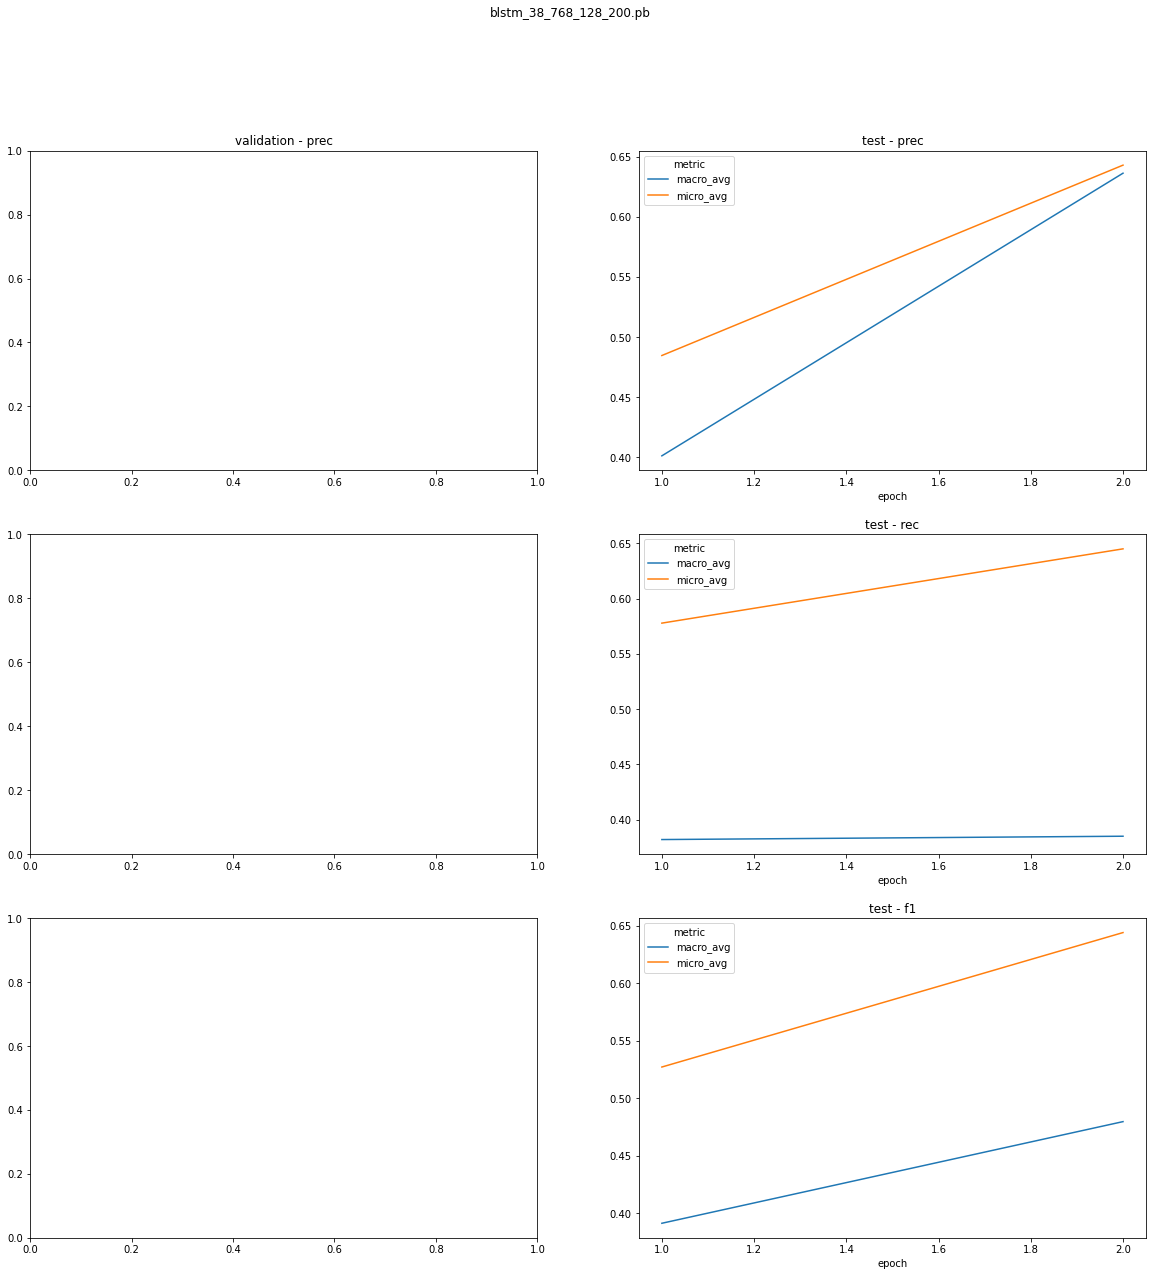

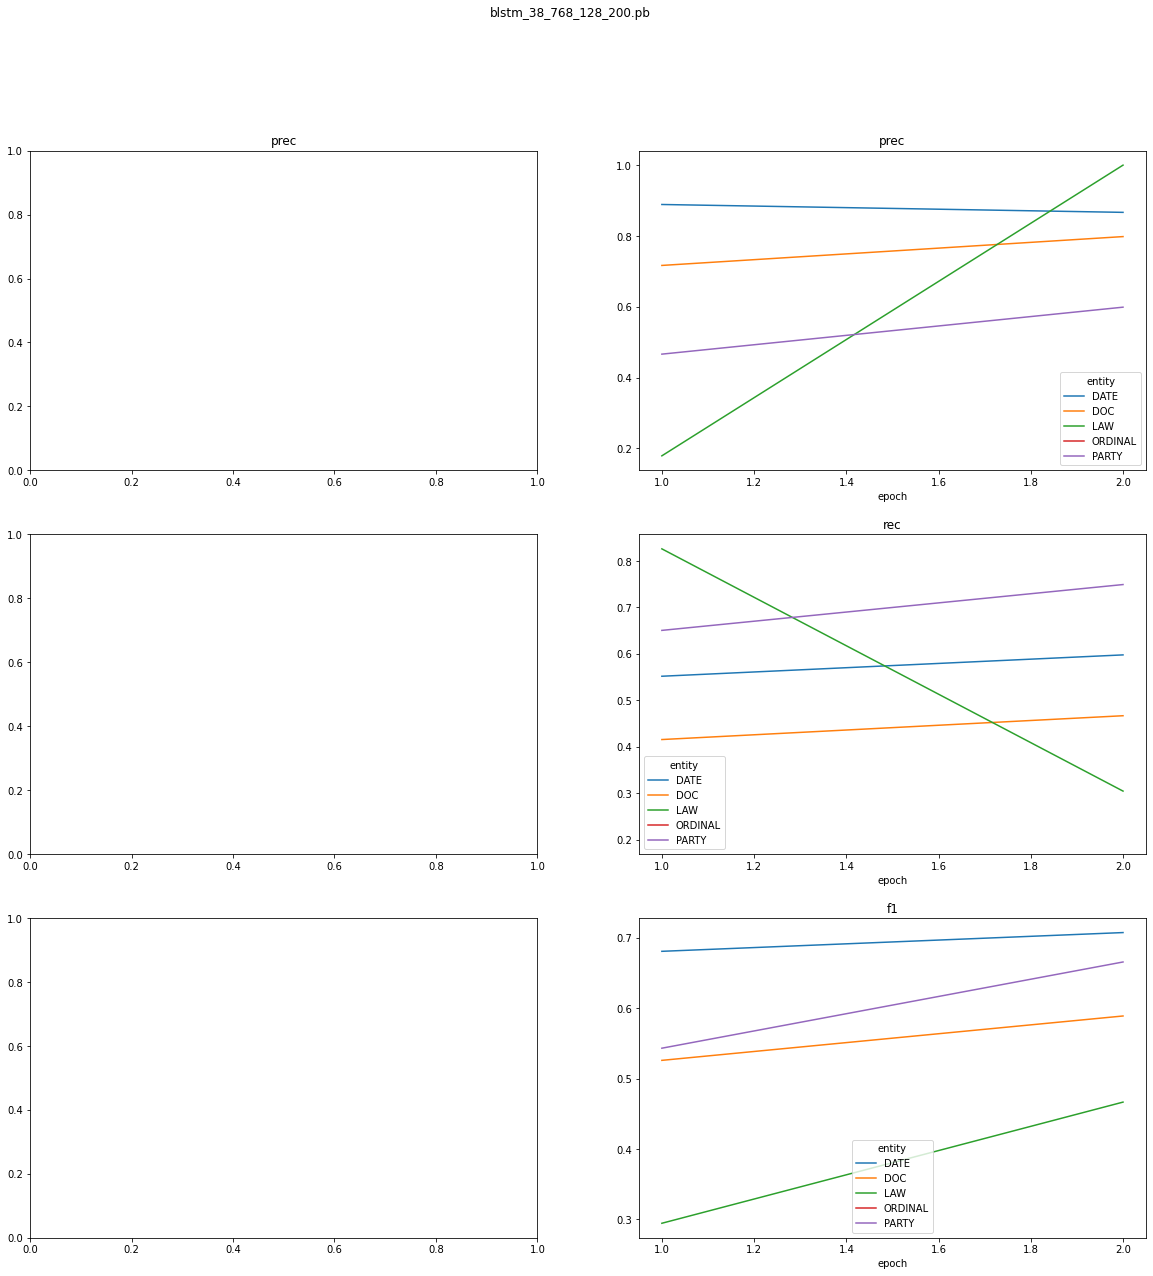

In [28]:
import ner_log_parser

%matplotlib inline

ner_log_parser.get_charts(log_file)

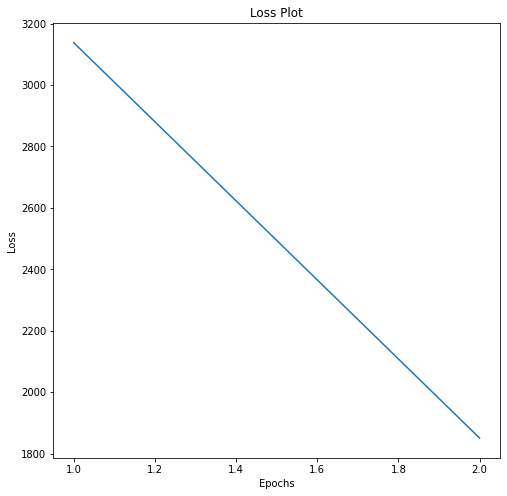

In [29]:
ner_log_parser.loss_plot(log_file)

Saving the model for future use by loading from disk with

```python
loaded_ner_model = (
    finance.NerModel.load("MY_SAVED_MODEL_PATH")
    .setInputCols(["sentence", "token", "embeddings"])
    .setOutputCol("ner")
)
```

In [30]:
ner_model.stages

[BERT_EMBEDDINGS_29ce72cd673e, LegalNerModel_2a416d03920d]

In [31]:
# Saving stage for NER model
ner_model.stages[1].write().overwrite().save('my_NER_model')

## Training a custom ClassifierDL

> -----------------------------------------------------
>**Please restart the runtime (if you are in Colab) to release memory that will be needed in training.**
>
> -----------------------------------------------------

In [1]:
import os
from johnsnowlabs import nlp, legal
import pyspark.sql.functions as F
from pyspark.sql.functions import col
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

spark = nlp.start()

📋 Loading license number 0 from /root/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json
👌 Launched cpu optimized session with with: 🚀Spark-NLP==4.2.4, 💊Spark-Healthcare==4.2.4, running on ⚡ PySpark==3.1.2


To train a multiclass classifier, we need to use the `ClassifierDLApproach` annotator. Let's get some training data and see how to create the pipeline for training.

In [36]:
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings_JSL/Legal/data/finance_clf_data.csv

We will filter the top 3 classes in the dataset:

- risk_factors
- financial_statements
- business

In [2]:
classes = [
    "risk_factors",
    "financial_statements",
    "business"
]

df = pd.read_csv('finance_clf_data.csv')
df = df.loc[df.label.isin(classes)].sample(1000)
print(df.shape)
df.head()

(1000, 3)


,text,label,len
1129,Sales and Marketing\n \nWe sell our product of...,business,706
4508,\n \nEncryption\n Dropbox file data at rest i...,business,370
5112,The Company has recorded the securities at fai...,financial_statements,379
5084,\n\n \n \n2020\n \n \n2019\n \n\n \n \n \n \n...,financial_statements,353
1837,In addition we expect that we will need less o...,risk_factors,1155


In [3]:
df['label'].value_counts()

financial_statements    396
risk_factors            382
business                222
Name: label, dtype: int64

We split in train and test sets, stratifying by the label column to guarantee all labels in both samples.

In [4]:
train_df, test_df = train_test_split(df, train_size=0.8, stratify=df.label)

train = spark.createDataFrame(train_df)
test = spark.createDataFrame(test_df)

In [5]:
train.groupBy("label") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+--------------------+-----+
|               label|count|
+--------------------+-----+
|financial_statements|  317|
|        risk_factors|  306|
|            business|  177|
+--------------------+-----+



In [6]:
test.groupBy("label") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+--------------------+-----+
|               label|count|
+--------------------+-----+
|financial_statements|   79|
|        risk_factors|   76|
|            business|   45|
+--------------------+-----+



We will use the `UniversalSentenceEncoder` embeddings, but you could also use other architectures if you need (e.g., `RoBERTa`).

In [7]:
document_assembler = (
    nlp.DocumentAssembler().setInputCol("text").setOutputCol("document")
)

embeddings = (
    nlp.UniversalSentenceEncoder.pretrained()
    .setInputCols("document")
    .setOutputCol("sentence_embeddings")
)

classifierdl = (
    legal.ClassifierDLApproach()
    .setInputCols(["sentence_embeddings"])
    .setOutputCol("class")
    .setLabelColumn("label")
    .setMaxEpochs(20)
    .setEnableOutputLogs(True)
    .setOutputLogsPath("cls_logs")
    .setBatchSize(8)
)

clf_pipeline = nlp.Pipeline(stages=[document_assembler, embeddings, classifierdl])

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


In [8]:
%%time

clf_pipelineModel = clf_pipeline.fit(train)

CPU times: user 283 ms, sys: 27.7 ms, total: 311 ms
Wall time: 37 s


In [12]:
log_file_name = os.listdir("cls_logs")[0]

with open("cls_logs/"+log_file_name, "r") as log_file :
    print(log_file.read())

Training started - epochs: 20 - learning_rate: 0.005 - batch_size: 8 - training_examples: 800 - classes: 3
Epoch 0/20 - 1.33s - loss: 80.58355 - acc: 0.73375 - batches: 100
Epoch 1/20 - 0.94s - loss: 69.26563 - acc: 0.855 - batches: 100
Epoch 2/20 - 0.92s - loss: 66.08948 - acc: 0.88 - batches: 100
Epoch 3/20 - 0.91s - loss: 63.99117 - acc: 0.90375 - batches: 100
Epoch 4/20 - 0.89s - loss: 62.232586 - acc: 0.91 - batches: 100
Epoch 5/20 - 1.14s - loss: 61.651657 - acc: 0.91125 - batches: 100
Epoch 6/20 - 0.93s - loss: 61.13254 - acc: 0.9125 - batches: 100
Epoch 7/20 - 0.89s - loss: 60.89958 - acc: 0.915 - batches: 100
Epoch 8/20 - 0.86s - loss: 60.802555 - acc: 0.9175 - batches: 100
Epoch 9/20 - 0.87s - loss: 60.69759 - acc: 0.9175 - batches: 100
Epoch 10/20 - 0.85s - loss: 60.597687 - acc: 0.9175 - batches: 100
Epoch 11/20 - 0.88s - loss: 60.52039 - acc: 0.92 - batches: 100
Epoch 12/20 - 1.18s - loss: 60.473053 - acc: 0.92125 - batches: 100
Epoch 13/20 - 1.13s - loss: 60.4456 - acc: 0

In [13]:
preds = clf_pipelineModel.transform(test)
preds_df = preds.select('label', 'text', "class.result").toPandas()

# The result is an array since in Spark NLP you can have multiple sentences.
# Let's explode the array and get the item(s) inside of result column out
preds_df['result'] = preds_df['result'].apply(lambda x : x[0])

preds_df.head()

,label,text,result
0,risk_factors,If we fail to comply with these licenses we ma...,risk_factors
1,financial_statements,Variable consideration\nThe Company s arrangem...,financial_statements
2,business,\n \nWe are an authorized distributor for Ado...,risk_factors
3,financial_statements,the Company s technology and product offerings...,financial_statements
4,financial_statements,\n9 298\n \nPrepaid expenses\n \n17 854\n \n1...,financial_statements


In [14]:
print (classification_report(preds_df['label'], preds_df['result']))

                      precision    recall  f1-score   support

            business       0.94      0.67      0.78        45
financial_statements       0.88      0.90      0.89        79
        risk_factors       0.78      0.89      0.83        76

            accuracy                           0.84       200
           macro avg       0.87      0.82      0.83       200
        weighted avg       0.85      0.84      0.84       200



### Saving and Loading the model

In [15]:
clf_pipelineModel.stages

[DocumentAssembler_66b6b4e56164,
 UNIVERSAL_SENTENCE_ENCODER_4de71669b7ec,
 LegalClassifierDLModel_c5549c5fb7e1]

In [16]:
clf_pipelineModel.stages[-1].write().overwrite().save('Clf_Use')

In [17]:
# Load back  saved Classifier Model
ClfModel = legal.ClassifierDLModel.load('Clf_Use')

In [18]:
ld_pipeline = nlp.Pipeline(stages=[document_assembler, embeddings,ClfModel])
ld_pipeline_model = ld_pipeline.fit(spark.createDataFrame([['']]).toDF("text"))

In [19]:
# Apply Model Transform to testData
ld_preds = ld_pipeline_model.transform(test)
ld_preds_df = ld_preds.select('text','label',"class.result").toPandas()
ld_preds_df.head()

,text,label,result
0,If we fail to comply with these licenses we ma...,risk_factors,[risk_factors]
1,Variable consideration\nThe Company s arrangem...,financial_statements,[financial_statements]
2,\n \nWe are an authorized distributor for Ado...,business,[risk_factors]
3,the Company s technology and product offerings...,financial_statements,[financial_statements]
4,\n9 298\n \nPrepaid expenses\n \n17 854\n \n1...,financial_statements,[financial_statements]


## Training a custom `MultiClassifierDL`

> -----------------------------------------------------
>**Please restart the runtime (if you are in Colab) to release memory that will be needed in training.**
>
> -----------------------------------------------------

In [1]:
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from pyspark.sql.functions import col
import pandas as pd
from johnsnowlabs import nlp, legal

In [3]:
spark = nlp.start()

spark

📋 Loading license number 0 from /root/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json
👌 Launched cpu optimized session with with: 🚀Spark-NLP==4.2.4, 💊Spark-Healthcare==4.2.4, running on ⚡ PySpark==3.1.2


In [1]:
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings_JSL/Legal/data/finance_data.csv

In [4]:
df = pd.read_csv('./finance_data.csv')
df['label'] = df['label'].apply(eval)
df = df.sample(500)
print(df.shape)

data = spark.createDataFrame(df)

train, test = data.randomSplit([0.8, 0.2], seed = 100)

(500, 2)


In [5]:
test.groupBy("label") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+--------------------+-----+
|               label|count|
+--------------------+-----+
|    [governing laws]|   16|
| [entire agreements]|   16|
|           [notices]|   10|
|        [amendments]|   10|
|      [counterparts]|   10|
|[assigns, success...|    7|
|          [survival]|    7|
|      [severability]|    4|
|[representations,...|    4|
|          [expenses]|    4|
|        [successors]|    3|
|           [waivers]|    3|
|      [terminations]|    3|
|[waivers, amendme...|    3|
|       [assignments]|    2|
|[amendments, term...|    1|
+--------------------+-----+



We will average a pretrained `RoBERTa` word embedding to train, but other models can also be used (including `USE`).

In [12]:
document_assembler = (
    nlp.DocumentAssembler().setInputCol("provision").setOutputCol("document")
)

tokenizer = nlp.Tokenizer().setInputCols(["document"]).setOutputCol("token")

embeddings = (
    nlp.RoBertaEmbeddings.pretrained("roberta_embeddings_legal_roberta_base", "en")
    .setInputCols(["document", "token"])
    .setOutputCol("embeddings")
    .setMaxSentenceLength(512)
)

embeddingsSentence = (
    nlp.SentenceEmbeddings()
    .setInputCols(["document", "embeddings"])
    .setOutputCol("sentence_embeddings")
    .setPoolingStrategy("AVERAGE")
)

classsifierdl = (
    nlp.MultiClassifierDLApproach()
    .setInputCols(["sentence_embeddings"])
    .setOutputCol("class")
    .setLabelColumn("label")
    .setMaxEpochs(2)
    .setEnableOutputLogs(True)
    .setOutputLogsPath("multilabel_logs")
    .setBatchSize(8)
)

clf_pipeline = nlp.Pipeline(
    stages=[
        document_assembler,
        tokenizer,
        embeddings,
        embeddingsSentence,
        classsifierdl,
    ]
)

roberta_embeddings_legal_roberta_base download started this may take some time.
Approximate size to download 447.2 MB
[OK!]


In [13]:
%%time
clf_pipelineModel = clf_pipeline.fit(train)

CPU times: user 12.2 s, sys: 1.39 s, total: 13.6 s
Wall time: 32min 12s


In [14]:
preds = clf_pipelineModel.transform(test)
preds_df = preds.select('provision','label',"class.result").toPandas()
preds_df.head()

,provision,label,result
0,"(a) THIS LETTER AGREEMENT AND ANY CLAIMS, CON...",[governing laws],[governing laws]
1,All notices and other communications hereunder...,[notices],[notices]
2,"All notices, requests, consents and other comm...",[notices],[notices]
3,An amendment which provides for a significant ...,[notices],[]
4,Any notice required to be given by the Employe...,[notices],[notices]


In [15]:
log_file_name = os.listdir("multilabel_logs")[0]

with open("multilabel_logs/"+log_file_name, "r") as log_file :
    print(log_file.read())

Training started - epochs: 2 - learning_rate: 0.001 - batch_size: 8 - training_examples: 397 - classes: 15
Epoch 0/2 - 44.54s - loss: 0.2976667 - acc: 0.92840123 - batches: 50
Epoch 1/2 - 33.40s - loss: 0.18604234 - acc: 0.9584353 - batches: 50



In [17]:
mlb = MultiLabelBinarizer()

y_true = mlb.fit_transform(preds_df['label'])
y_pred = mlb.transform(preds_df['result'])

print("Classification report: \n", (classification_report(y_true, y_pred)))
print("F1 micro averaging:",(f1_score(y_true, y_pred, average='micro')))
print("ROC: ",(roc_auc_score(y_true, y_pred, average="micro")))


Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.21      0.35        14
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       1.00      0.90      0.95        10
           4       1.00      0.81      0.90        16
           5       0.00      0.00      0.00         4
           6       1.00      0.88      0.93        16
           7       1.00      0.60      0.75        10
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         4
          10       1.00      0.40      0.57        10
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         4

   micro avg       1.00      0.42      0.59       118
   macro avg       0.40      0.25      0.30       118
w

### Saving and Loading the model

In [18]:
clf_pipelineModel.stages

[DocumentAssembler_83ff90c579f1,
 REGEX_TOKENIZER_9f8f816dfb94,
 ROBERTA_EMBEDDINGS_b915dff90901,
 SentenceEmbeddings_06847c8a1ce0,
 MultiClassifierDLModel_097ed6701015]

Save to disk

In [19]:
clf_pipelineModel.stages[-1].write().overwrite().save('MultilabelClfRoBerta')

Load from disk

In [20]:
# Load back  saved Multilabel Classifier Model
MultilabelClfModel = nlp.MultiClassifierDLModel.load('MultilabelClfRoBerta')

Create pipeline with the loaded model

In [21]:
ld_pipeline = nlp.Pipeline(
    stages=[
        document_assembler,
        tokenizer,
        embeddings,
        embeddingsSentence,
        MultilabelClfModel,
    ]
)
ld_pipeline_model = ld_pipeline.fit(spark.createDataFrame([[""]]).toDF("provision"))

Make predictions with the new model

In [22]:
# Apply Model Transform to testData
ld_preds = ld_pipeline_model.transform(test)
ld_preds_df = ld_preds.select('provision','label',"class.result").toPandas()
ld_preds_df.head(10)

,provision,label,result
0,"(a) THIS LETTER AGREEMENT AND ANY CLAIMS, CON...",[governing laws],[governing laws]
1,All notices and other communications hereunder...,[notices],[notices]
2,"All notices, requests, consents and other comm...",[notices],[notices]
3,An amendment which provides for a significant ...,[notices],[]
4,Any notice required to be given by the Employe...,[notices],[notices]
5,Any provision in this Agreement or in the Deed...,[survival],[]
6,As an additional consideration for the extensi...,[governing laws],[]
7,"At the Closing, the Company shall reimburse Bu...",[expenses],[]
8,"Borrower shall promptly, and in any event with...",[notices],[]
9,"Borrower, and any endorsers and guarantors her...",[waivers],[]
